### Exploratory Data Analysis — Coursera Courses

<img src='https://storage.googleapis.com/kaggle-datasets-images/3891594/6761486/874e26cd38279538ab7af5b3ad90da75/dataset-cover.jpg?t=2023-10-22-04-46-09' width=500 align='left'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
courses = pd.read_csv("coursera_courses.csv")
courses.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
courses.head()

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
4,918,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


# Fields' description
- course_title — as name suggested  
- course_organization — as name suggested  
- course_certificate_type — specialization / certificate / course / etc  
- course_rating — as name suggested (could be None)  
- course_review_num — number of reviews for the course (could be None)  
- course_time — estimated time to complete the program; string in the format: x - y Months (e.g. 1 - 3 Months)  
- course_difficulty — as name suggested (Beginner, Intermediate, Advanced, Mixed)  
- course_students_enrolled — as name suggested  
- course_url — url for the course  
- course_skills — skills you'll gain from the course, according to the course web page (could be empty)  
- course_summary — bullet points from the "What you'll learn" section (could be empty)  
- course_description — paragraphs string of the description of the course provided by the organization, located in the lower half of the web page  

In [3]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   course_title              1000 non-null   object 
 2   course_organization       1000 non-null   object 
 3   course_certificate_type   1000 non-null   object 
 4   course_time               1000 non-null   object 
 5   course_rating             994 non-null    float64
 6   course_reviews_num        994 non-null    object 
 7   course_difficulty         1000 non-null   object 
 8   course_url                1000 non-null   object 
 9   course_students_enrolled  964 non-null    object 
 10  course_skills             1000 non-null   object 
 11  course_summary            1000 non-null   object 
 12  course_description        999 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


In [4]:
courses.dropna(axis=0, inplace=True)
courses.isna().sum()

index                       0
course_title                0
course_organization         0
course_certificate_type     0
course_time                 0
course_rating               0
course_reviews_num          0
course_difficulty           0
course_url                  0
course_students_enrolled    0
course_skills               0
course_summary              0
course_description          0
dtype: int64

### Number of unique organizations 

In [5]:
un_n = courses['course_organization'].nunique()
print(f'number of organizations: {un_n}')

number of organizations: 153


### Most frequent skills obtained during courses

In [6]:
import re
from collections import Counter

#extracting each skill from string of skills separated by commas
def extract_substrings(string):
    pattern = r'(?<=\').*?(?=\')'
    matches = re.findall(pattern, string)
    return matches

#counting them
course_skills = Counter()
for row in courses['course_skills'].apply(lambda x: set(extract_substrings(x))):
    course_skills += Counter(row)

course_skills = pd.DataFrame.from_dict(course_skills, orient='index', columns={'count'})
course_skills.drop([', '], axis=0, inplace=True)
course_skills = course_skills.reset_index().rename(columns={'index': 'skill'})
course_skills.sort_values(by='count', inplace=True, ascending=False)
course_skills.head()

,skill,count
32,Data Analysis,102
101,Python Programming,75
29,Machine Learning,72
141,Communication,66
9,Computer Programming,52


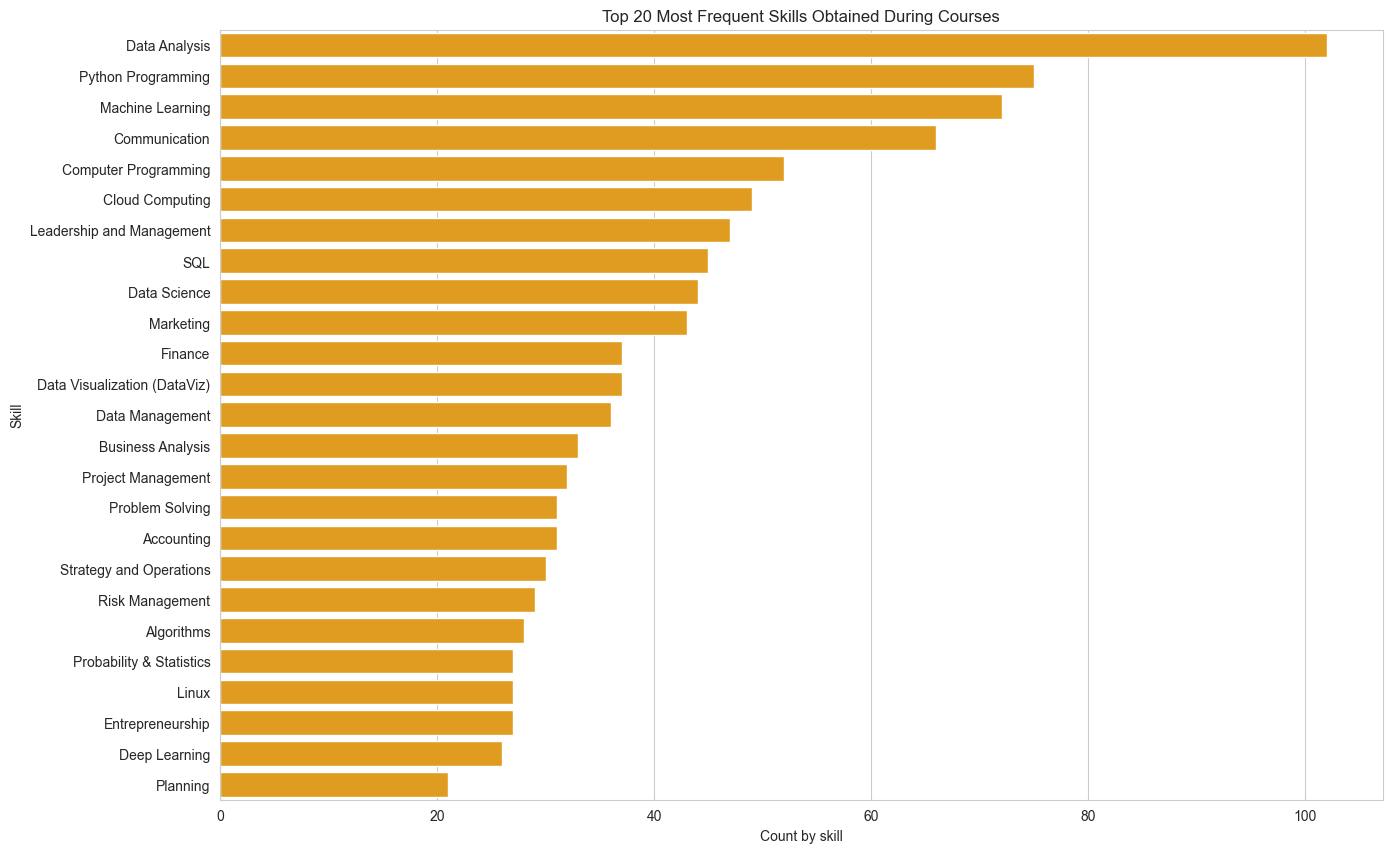

In [7]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=course_skills.iloc[:25], y='skill', x='count', color='orange')
ax.set_xlabel('Count by skill')
ax.set_ylabel('Skill')
ax.set_title('Top 20 Most Frequent Skills Obtained During Courses')
plt.show()

### Top course organizations by number of courses 

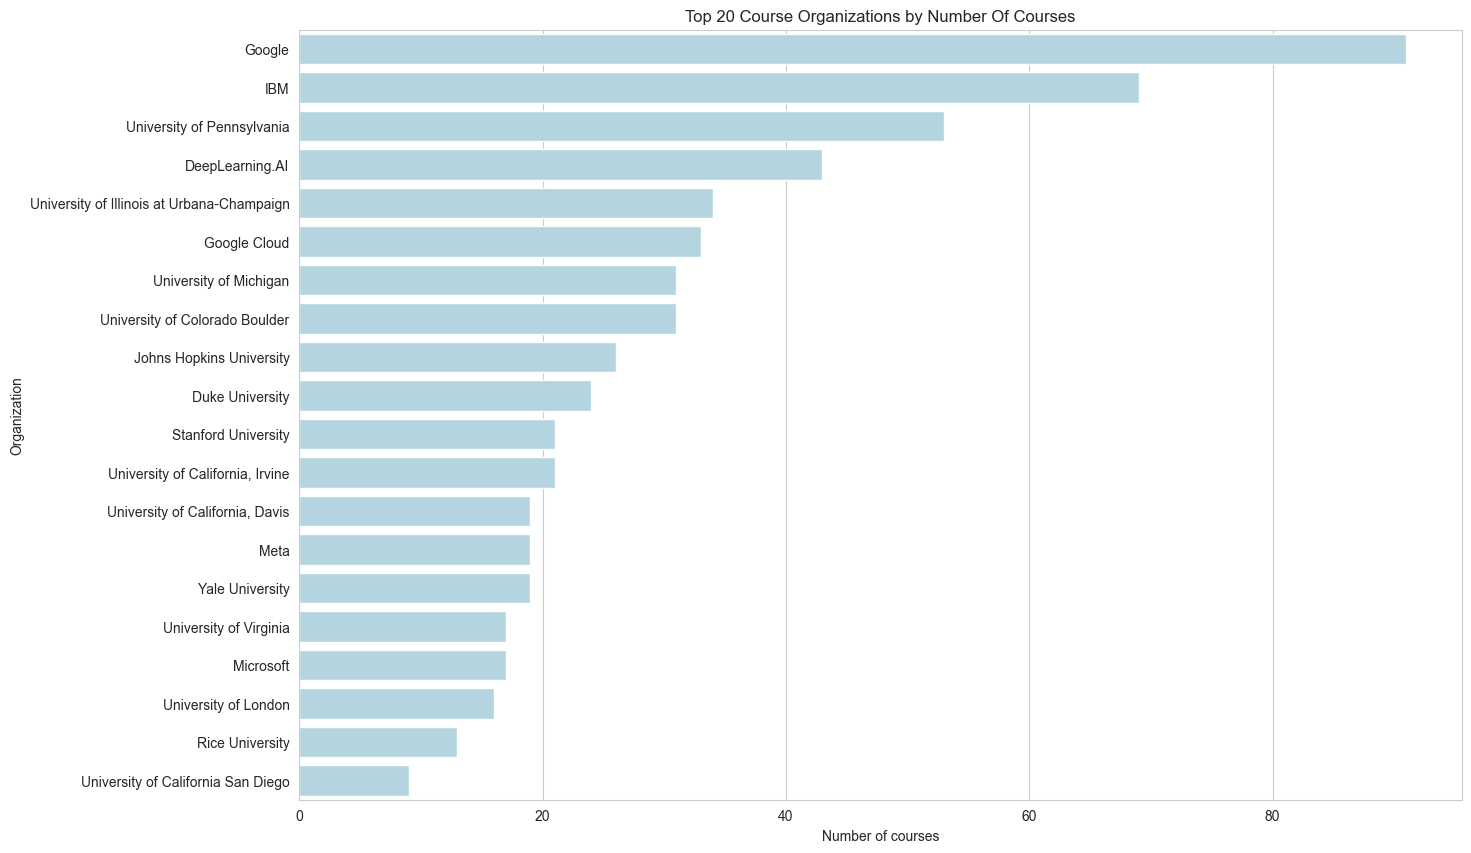

In [8]:
tmp_df = pd.DataFrame(courses['course_organization'].value_counts()).reset_index()
tmp_df.columns = ['course_organization', 'count']

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=tmp_df[:20], x='count', y='course_organization', color='lightblue')
ax.set_xlabel('Number of courses')
ax.set_ylabel('Organization')
ax.set_title('Top 20 Course Organizations by Number Of Courses')
plt.show()

### Top courses by enrolled students

Converting 'course_students_enrolled' and 'course_reviews_num' to an integer data type:

In [9]:
courses['course_students_enrolled'] = courses['course_students_enrolled'].str.replace(',','').astype(int)

                                          course_title  \
941                          The Science of Well-Being   
646  Learning How to Learn: Powerful mental tools t...   
797  Programming for Everybody (Getting Started wit...   
296                     English for Career Development   
372                Foundations: Data, Data, Everywhere   
..                                                 ...   
468         Healthy and Sustainable Foods and Products   
957                             UCI Project Management   
717  Microsoft Windows Defender and Firewall for Be...   
568              Introduction to Environmental Science   
804                                     Project Launch   

     course_students_enrolled  
941                   4584160  
646                   3630211  
797                   2967534  
296                   2238004  
372                   2152359  
..                        ...  
468                      1639  
957                      1631  
717            

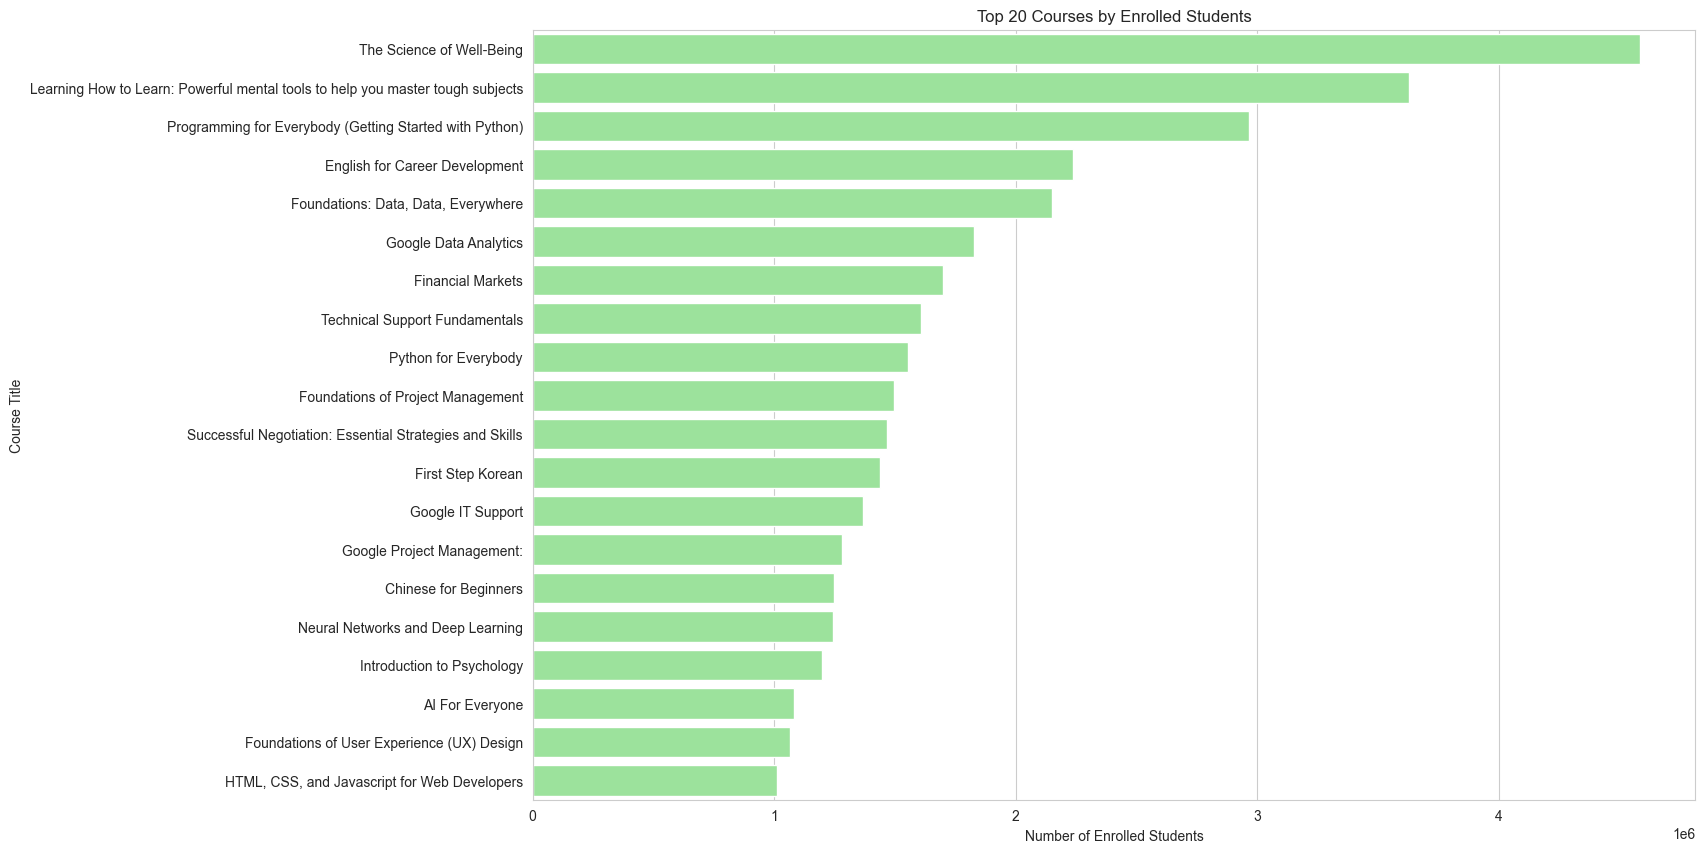

In [10]:
tmp_df = courses.sort_values(by='course_students_enrolled', ascending=False)[['course_title', 'course_students_enrolled']]
print(tmp_df)
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=tmp_df[:20], x='course_students_enrolled', y='course_title', color='lightgreen')
ax.set_xlabel('Number of Enrolled Students')
ax.set_ylabel('Course Title')
ax.set_title('Top 20 Courses by Enrolled Students')
plt.show()

### Distribution of course difficulties

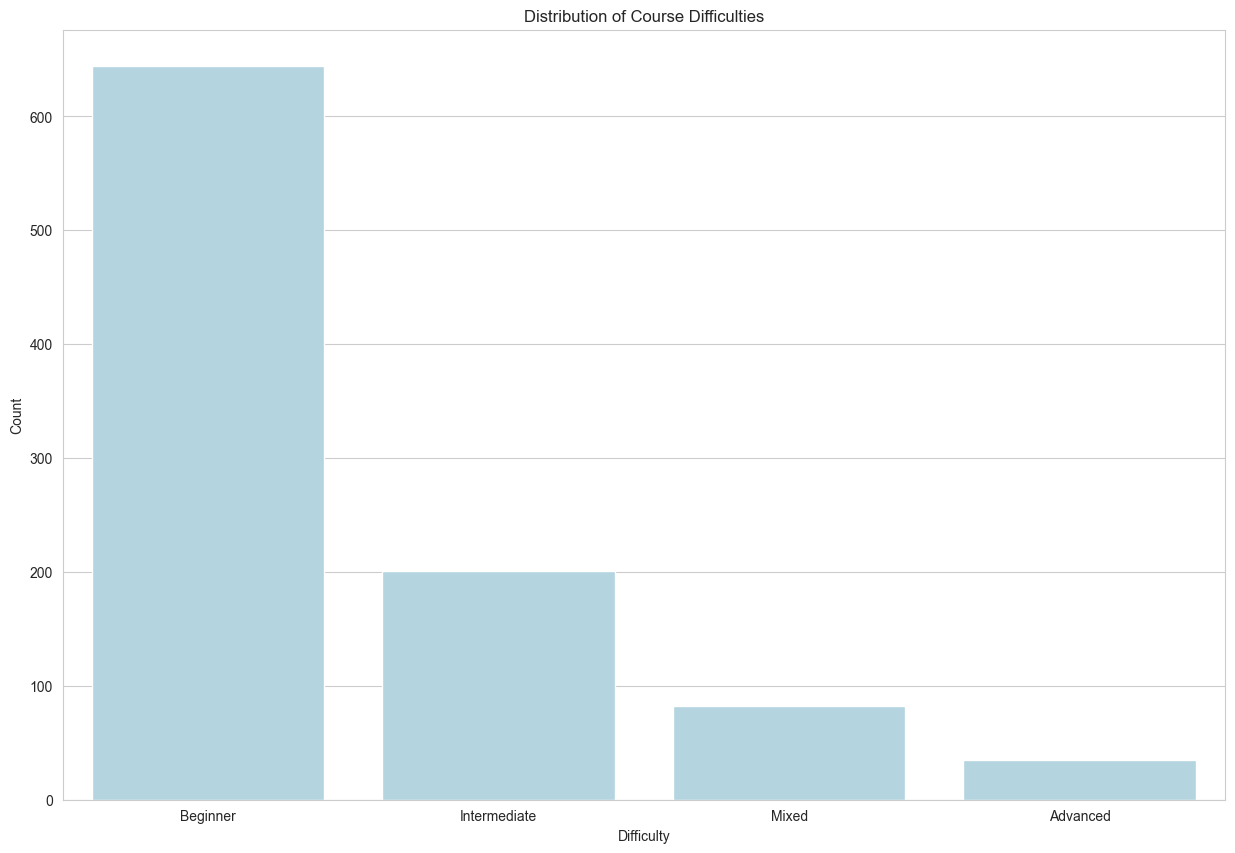

In [11]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data=courses, x='course_difficulty', color='lightblue')
ax.set_xlabel('Difficulty')
ax.set_ylabel('Count')
ax.set_title('Distribution of Course Difficulties')
plt.show()

### Distribution of course certificate types

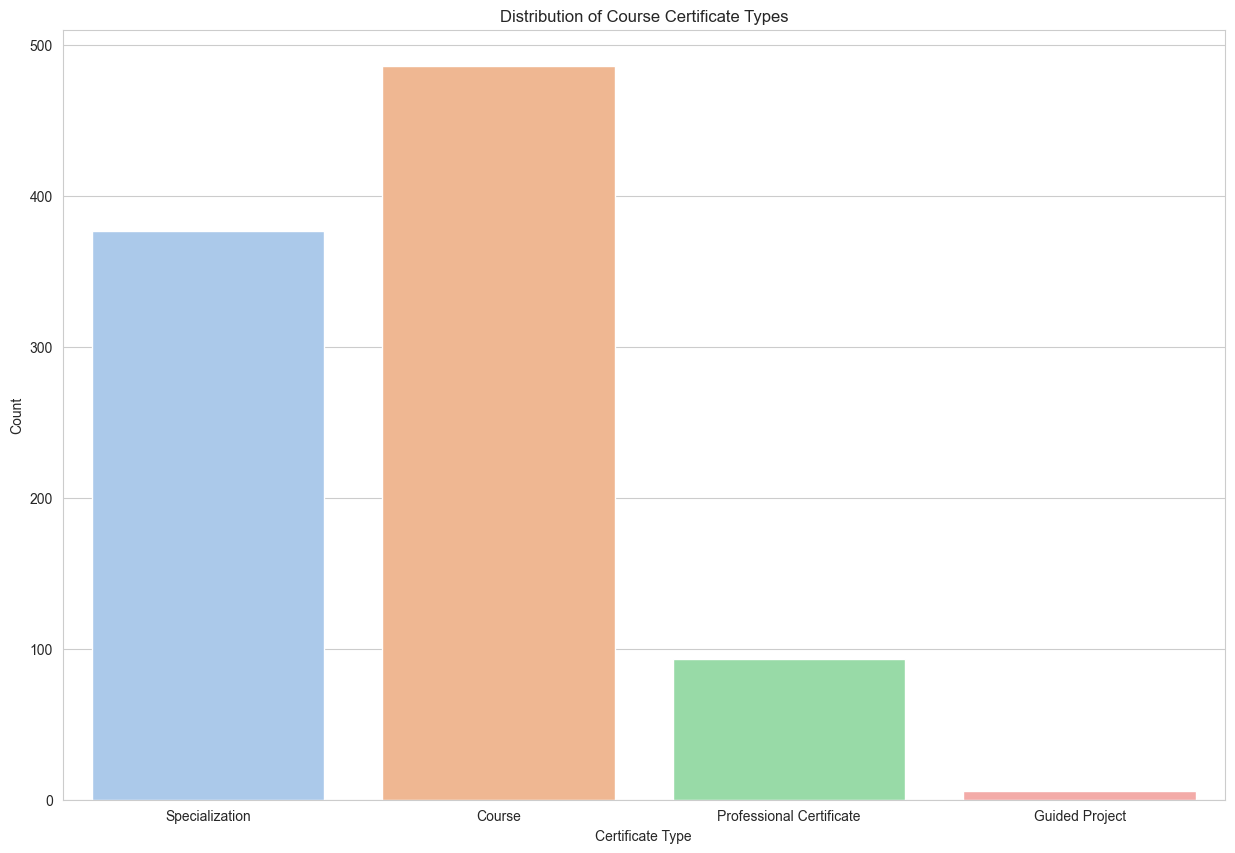

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data=courses, x='course_certificate_type', palette="pastel")
ax.set_xlabel('Certificate Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Course Certificate Types')
plt.show()

Let's find the correlations between the numerical variables:

,course_rating,course_reviews_num,course_students_enrolled
course_rating,1.000000,0.097886,0.163035
course_reviews_num,0.097886,1.000000,0.600764
course_students_enrolled,0.163035,0.600764,1.000000


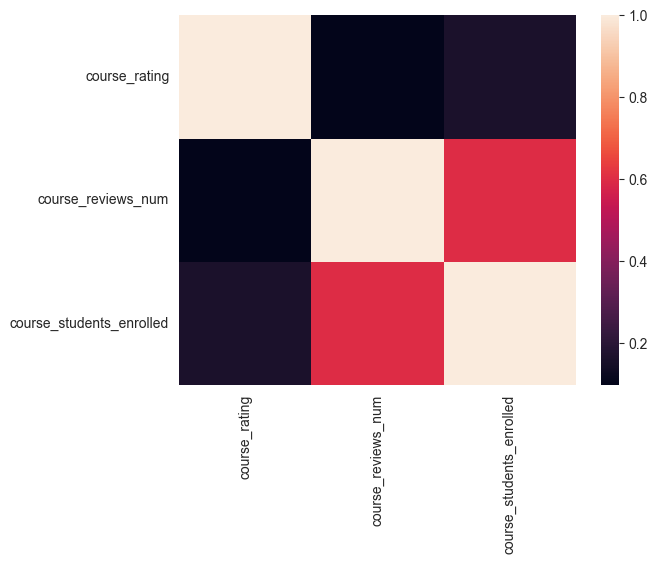

In [38]:
courses.head()
corr = courses[['course_rating', 'course_reviews_num', 'course_students_enrolled']].corr()
sns.heatmap(corr);
corr

### Does difficulty affect rating?

In [13]:
courses.head()

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,38833,[],[],We have all heard the phrase “correlation does...
5,433,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,https://www.coursera.org/learn/ai-law,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...


,course_difficulty,course_rating
0,Mixed,4.731707
1,Beginner,4.704037
2,Intermediate,4.632338
3,Advanced,4.528571


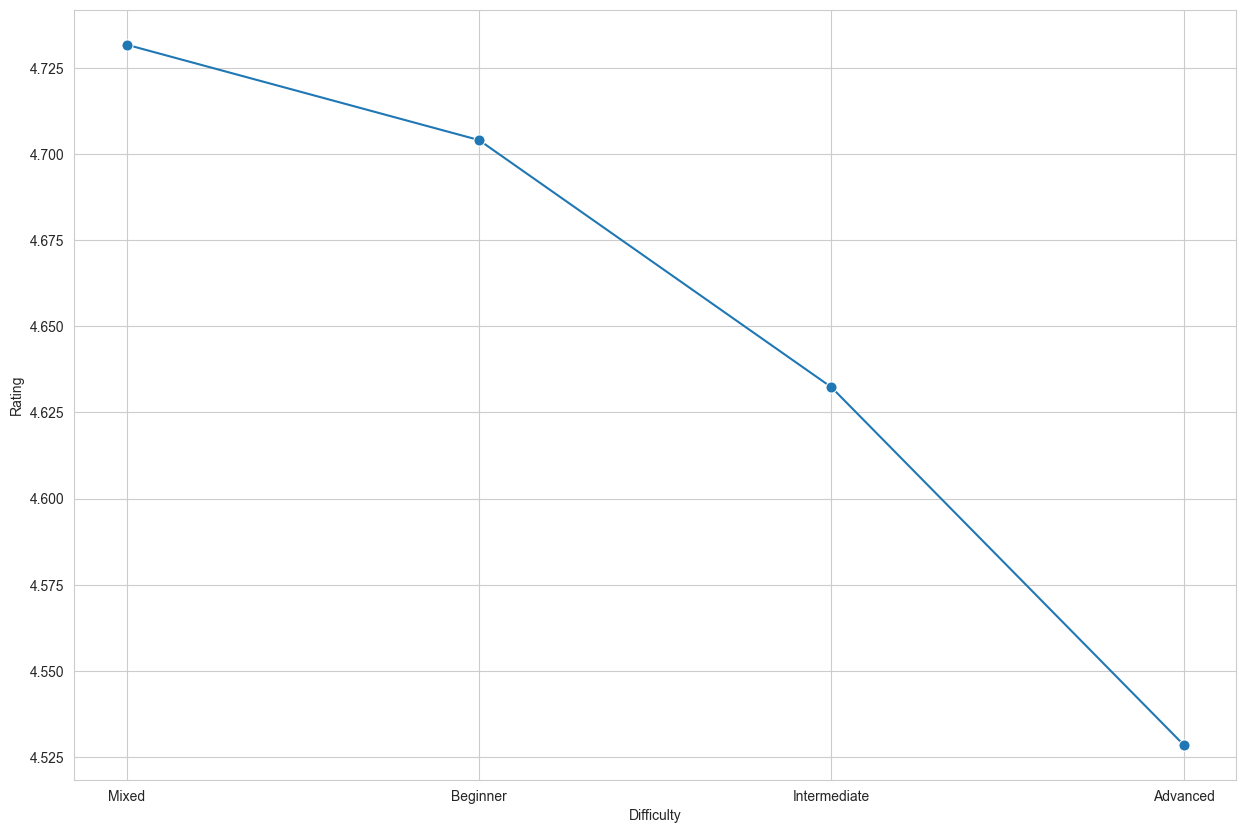

In [14]:
sns.set_style('whitegrid')
top_difficulty = pd.DataFrame(courses.groupby('course_difficulty')['course_rating']
                              .mean()
                              .sort_values(ascending=False)).reset_index()
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.lineplot(data=top_difficulty, x='course_difficulty', y='course_rating', marker='o', markersize=8)
ax.set_xlabel('Difficulty')
ax.set_ylabel('Rating')
top_difficulty

In [15]:
top_difficulty = pd.DataFrame(courses.groupby('course_difficulty')['course_rating']
                              .median()
                              .sort_values(ascending=False)).reset_index()
top_difficulty

,course_difficulty,course_rating
0,Mixed,4.8
1,Advanced,4.7
2,Beginner,4.7
3,Intermediate,4.7


>The means are different, but the medians are the same

__Let's assume that the sample came from a normal distribution  
Let's build $99\%$ accurate confidence intervals for all difficulties  
Which of them does the overall average fall into?__ 




In [16]:
df_diff = pd.DataFrame(courses.groupby('course_difficulty')['course_rating'].agg(['mean', 'std', 'count'])).reset_index()
df_diff

,course_difficulty,mean,std,count
0,Advanced,4.528571,0.359388,35
1,Beginner,4.704037,0.136437,644
2,Intermediate,4.632338,0.222034,201
3,Mixed,4.731707,0.136877,82


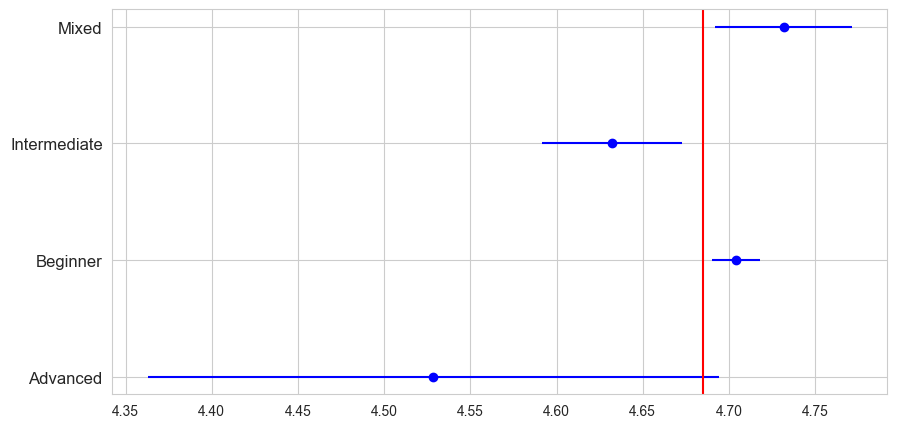

In [17]:
alpha = 0.01
df_diff['t_crit'] = df_diff['count'].apply(lambda w: stats.t(w - 1).ppf(1 - alpha/2))
df_diff['step'] = df_diff['t_crit'] * df_diff['std']/np.sqrt(df_diff['count'])

center = df_diff['mean'].values
step = df_diff['step'].values

mu_hat = courses['course_rating'].mean()
f, ax = plt.subplots(figsize=(10, 5))
plt.errorbar(center, np.arange(center.size), xerr=step, capsize=0, fmt='o', color='blue')
plt.yticks(np.arange(center.size - 1, -1, -1), df_diff['course_difficulty'][::-1], fontsize=12);
plt.axvline(mu_hat, 0, color='red');

- On average, the ratings of intermediate and advanced are lower than those of mixed and beginner

### Was it possible to use the normal distribution?

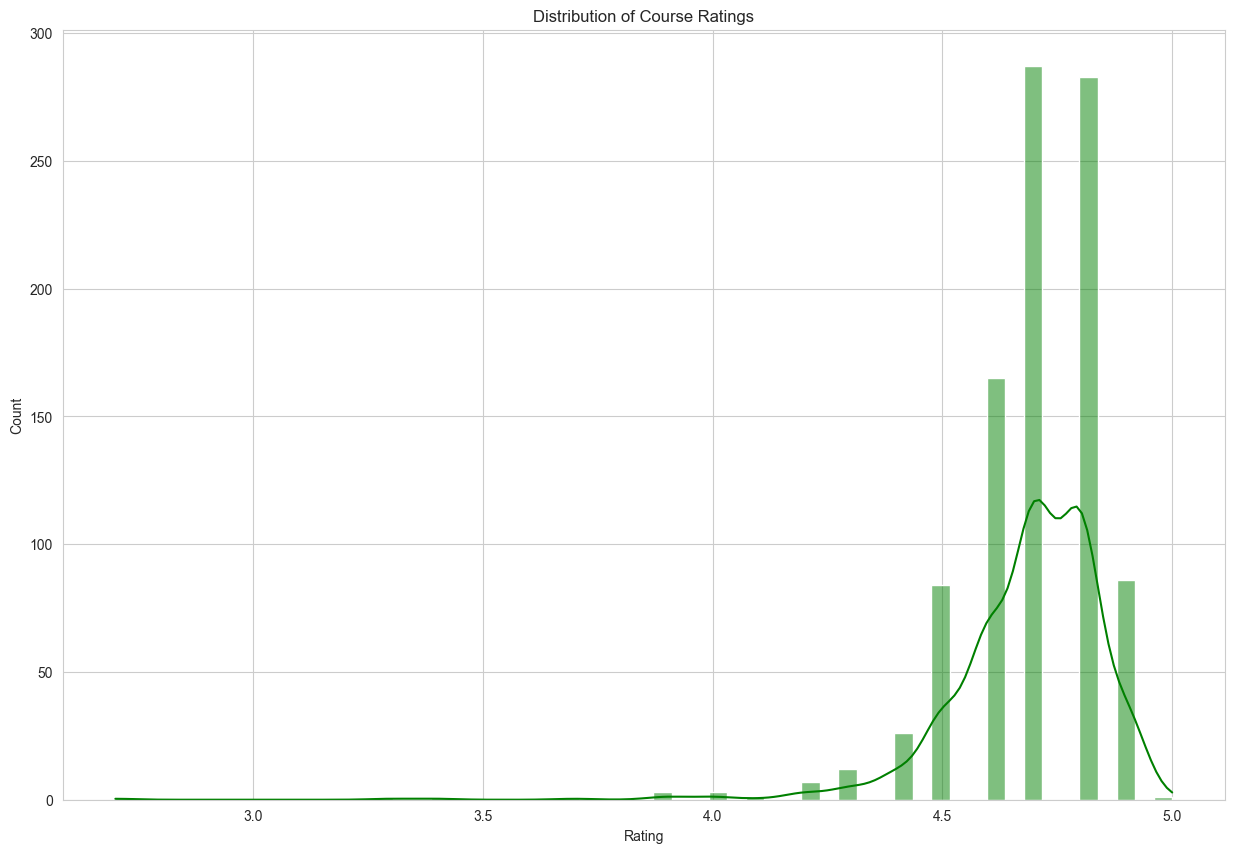

In [18]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data=courses, x='course_rating', color='green', kde=True)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Course Ratings')
plt.show()


The distribution doesn't look like normal distribution  
Let's look at the distribution of logarithmic ratings

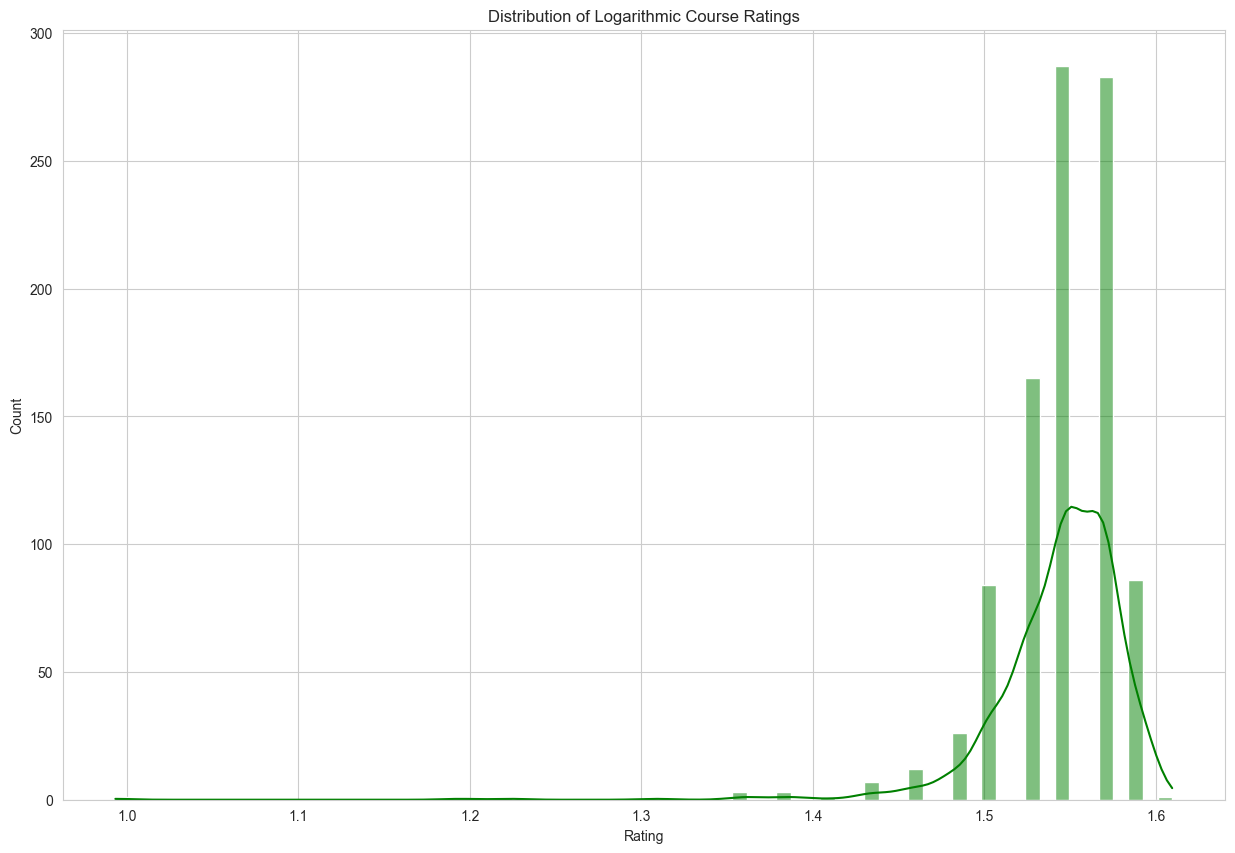

In [19]:
x = courses['course_rating'].apply(np.log).values
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(data=x, color='green', kde=True)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution of Logarithmic Course Ratings')
plt.show()

We can formally test the hypothesis of whether a sample has a normal distribution using the Kolmogorov-Smirnov test

In [20]:
stats.kstest(courses['course_rating'], 'norm', args=(courses['course_rating'].mean(), courses['course_rating'].std(ddof=1)))

KstestResult(statistic=0.2169575414222682, pvalue=3.113023346074902e-40, statistic_location=4.7, statistic_sign=-1)

In [21]:
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.22180864027790814, pvalue=4.7209511098411986e-42, statistic_location=1.547562508716013, statistic_sign=-1)

In both cases p-value is very low, so the sample is not normal

### Does difficulty affect number of enrolled students?

In [22]:
courses.head(3)

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."


Converting 'course_reviews_num' to an integer data type:

In [23]:
courses.loc[~courses['course_reviews_num'].str.isdigit(), 'course_reviews_num']

9      39.2k
11     13.9k
20      1.9k
21      2.2k
22      1.2k
       ...  
990     1.4k
993    16.7k
994       8k
995     4.6k
996     1.2k
Name: course_reviews_num, Length: 614, dtype: object

Getting rid of 'k' and multiplying by 1000, then converting to an integer data type:

In [24]:
courses.loc[~courses['course_reviews_num']
            .str.isdigit(), 'course_reviews_num'] = courses.loc[~courses['course_reviews_num']
                                                                .str
                                                                .isdigit(), 'course_reviews_num'].str.replace('k','').astype(float)*1_000

courses['course_reviews_num'] = courses['course_reviews_num'].astype(int)

In [25]:
courses.info();
courses.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     962 non-null    int64  
 1   course_title              962 non-null    object 
 2   course_organization       962 non-null    object 
 3   course_certificate_type   962 non-null    object 
 4   course_time               962 non-null    object 
 5   course_rating             962 non-null    float64
 6   course_reviews_num        962 non-null    int32  
 7   course_difficulty         962 non-null    object 
 8   course_url                962 non-null    object 
 9   course_students_enrolled  962 non-null    int32  
 10  course_skills             962 non-null    object 
 11  course_summary            962 non-null    object 
 12  course_description        962 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(9)
memory usage: 97.7+ 

,index,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,6706,"['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,2140,"['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,4282,[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,38833,[],[],We have all heard the phrase “correlation does...
5,433,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,https://www.coursera.org/learn/ai-law,25442,[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...


In [26]:
courses.groupby('course_difficulty')[['course_students_enrolled', 'course_reviews_num']].agg(['mean', 'median', 'std'])

course_students_enrolled                           \
                                      mean    median            std   
course_difficulty                                                     
Advanced                      46462.628571   27438.0   59420.829559   
Beginner                     144941.793478   46404.5  307808.361295   
Intermediate                  84116.437811   36052.0  150460.115899   
Mixed                        296270.670732  148787.0  578259.394371   

                  course_reviews_num                        
                                mean  median           std  
course_difficulty                                           
Advanced                 1048.828571   560.0   1106.830437  
Beginner                 8802.795031  2100.0  22181.100271  
Intermediate             7604.756219  1800.0  17698.576806  
Mixed                    5090.024390  3400.0   5942.550402

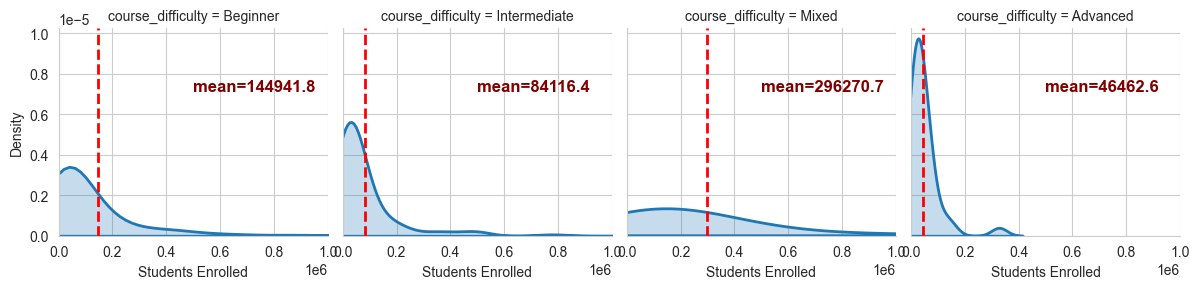

In [27]:
def add_mean_line(data, var=None, **kws):
    if not var: return
    
    m = np.mean(data[var])
    ax = plt.gca()
    ax.axvline(m, color='red', lw=2, ls='--')
    
    ax.text(0.5, 0.7, f'mean={m:.1f}',
           transform=ax.transAxes,
           color='maroon', fontweight='bold', fontsize=12)
    
g = sns.FacetGrid(courses, col='course_difficulty')
g.map_dataframe(sns.kdeplot, x='course_students_enrolled', lw=2, fill=True);
g.map_dataframe(add_mean_line, var='course_students_enrolled');
g.set(xlim=(0, 1_000_000), xlabel='Students Enrolled');